In [14]:
# LINEAR REGRESSION
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
# To change the default values
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
            
plt.rcParams.update(params)
from sklearn.datasets import make_regression
import seaborn as sns

In [25]:
x, y, cof = make_regression(n_samples=500, n_features=1, bias=4.2, noise=7.1, coef=True)
print x.shape, y.shape, cof

split = int(0.8* x.shape[0])
x_train = x[:split]
x_test = x[split:]

y_train = y[:split]
y_test = y[split:]

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape

(500, 1) (500,) 49.9541946096
(400, 1) (100, 1)
(400,) (100,)


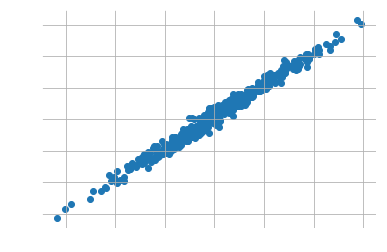

In [26]:
# w0=bias  w1=cof
plt.scatter(x[:,0],y)
plt.grid(True)
plt.show()

In [38]:
def hypothesis(x,w):
    return x*w[1] + w[0]


def get_error(y_true,x,w):
    err = 0.0
    m = x.shape[0]
    for ix in range(m):
        err += (y_true[ix]-hypothesis([ix],w))**2
    err = err / (2 * m)
    return err


def get_gradients(y_true,x,w):
    gradient_00 = 0.0
    gradient_01 = 0.0
    
    # numberof examples
    m = x.shape[0] 
    
    for ix in range(m):
        gradient_00 += (y_true[ix] - hypothesis(x[ix],w))*(-1)
        gradient_01 += (y_true[ix] - hypothesis(x[ix],w))*(-1*x[ix])
        
    gradient_00 = gradient_00 / m
    gradient_01 = gradient_01 / m
    
    return [gradient_00,gradient_01]
    
def gradient_descent(x,y_true,w,learning_rate=0.1):
    error = get_error(y_true, x, w)
    [gradient_00,gradient_01] = get_gradients(y_true,x,w)
    
    w[0] = w[0] - learning_rate*gradient_00
    w[1] = w[1] - learning_rate*gradient_01
    
    return error, w

In [39]:
w = np.array([0.1,0.1])
loss = []

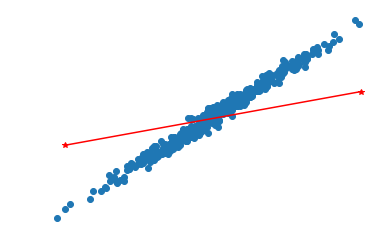

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


In [62]:
plt.scatter(x[:,0],y)
y_01 = hypothesis(-3,w)
y_02 = hypothesis(3,w)

plt.plot([-3,3],[y_01,y_02],'r*-')
plt.show()

l,w = gradient_descent(x_train, y_train,w, learning_rate=0.02)
loss.append(l)

# This is not working check why
# plt.plot(loss)
# plt.show()
# print w 